# Compare ice thinkness from CS2_SMOS v2.2 and v2.0 

In [1]:
# allow plots to be interactive in the notebook
%matplotlib notebook

import numpy as np
import datetime as dt
import pynextsim.openers as pnops
import mod_netcdf_utils as mnu
import pynextsim.gridding as png
from pynextsim.netcdf_list import NetcdfList
from pynextsim.irregular_grid_interpolator import IrregularGridInterpolator
import matplotlib.pyplot as plt
from pynextsim.nextsim_bin import NextsimBin as nb

import os 
import sys

import matplotlib.colors as colors

In [39]:
# get ice thickness from cs2smos (v2.2 and v2.0)

obs_inpath = '/cluster/projects/nn2993k/sim/data/'

obs1_file = obs_inpath + 'CS2_SMOS_v2.0/awi-cs2smos-l4-sithick-cryosat2_smos_merged-rep-nh25km_ease2-20121231_20130106-fv2p0.nc'
obs2_file = obs_inpath + 'CS2_SMOS_v2.2/W_XX-ESA,SMOS_CS2,NH_25KM_EASE2_20121231_20130106_r_v202_01_l4sit.nc'

o = pnops.OpenerCs2SmosThick()

nc1 = NetcdfList([obs1_file])
nc2 = NetcdfList([obs2_file])

date1=nc1.datetimes
date2=nc2.datetimes

dto=dt.datetime(2013,1,3,12,0)

print(nc2.variables)

var1 = nc1.get_var(dto, 'analysis_ice_thickness')
var2 = nc2.get_var(dto, 'analysis_sea_ice_thickness')

# get projection
proj=o.projection.pyproj

['analysis_sea_ice_thickness', 'background_sea_ice_thickness', 'weighted_mean_sea_ice_thickness', 'innovation', 'sea_ice_concentration', 'sea_ice_type', 'correlation_length_scale', 'analysis_sea_ice_thickness_unc', 'smos_sea_ice_thickness', 'cryosat_sea_ice_thickness']


<IPython.core.display.Javascript object>


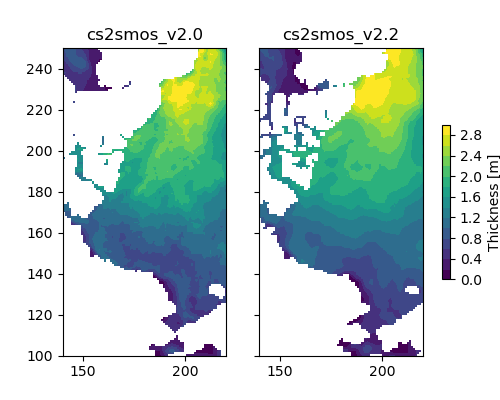

In [104]:
# Plot 

bounds=np.linspace(0,3,16)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

fig, ax = plt.subplots(ncols=2,figsize=(5,4))

ax[0].set_xlim(140,220)
ax[0].set_ylim(100,250)

ax[1].set_xlim(140,220)
ax[1].set_ylim(100,250)


ax[0].imshow(var1 ,origin='upper', norm=norm)
im2=ax[1].imshow(var2, origin='upper', norm=norm)



ax[0].set_title('cs2smos_v2.0')
ax[1].set_title('cs2smos_v2.2')

ax[1].yaxis.set_ticklabels([])
fig.colorbar(im2, ax=ax.ravel().tolist(), label='Thickness [m]', fraction=0.02)

outpath_plots = 'plots/'
fig.savefig(outpath_plots+'Thickness_CS2SMOS_v2.0_v2.2_'+ str(dto.strftime('%Y%m%d'))+'.png',bbox_inches='tight')

#plt.tight_layout()